<center><img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" title="Title text" width="30%" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 1 </H3>
<hr style="height:2px;border:none"/>
<H3 align='center'> Grupo - Colo-Colo 2006  </H3>
<hr style="height:2px;border:none"/>

# Integrantes 

* Javier Fuentes 
* Maryon Morales
* Javiera Moreno

#Hipótesis
> **5. Regresión sobre Datos Altamente Dimensionales:** Al entrenar un modelo de regresión lineal con pocos ejemplos y muchas características ($d >> n$), la tendencia del modelo a overfitting aumenta y también lo hace la varianza del modelo.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression



# Primer Dataset. Human resources
 [Link del Data set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)

In [4]:
df = pd.read_csv('HRDataset_v14.csv')
df.head(20)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [5]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


### Exploratory Data Analysis:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [8]:
row, columns = df.shape[0], df.shape[1]
row,columns

(311, 36)

<AxesSubplot:>

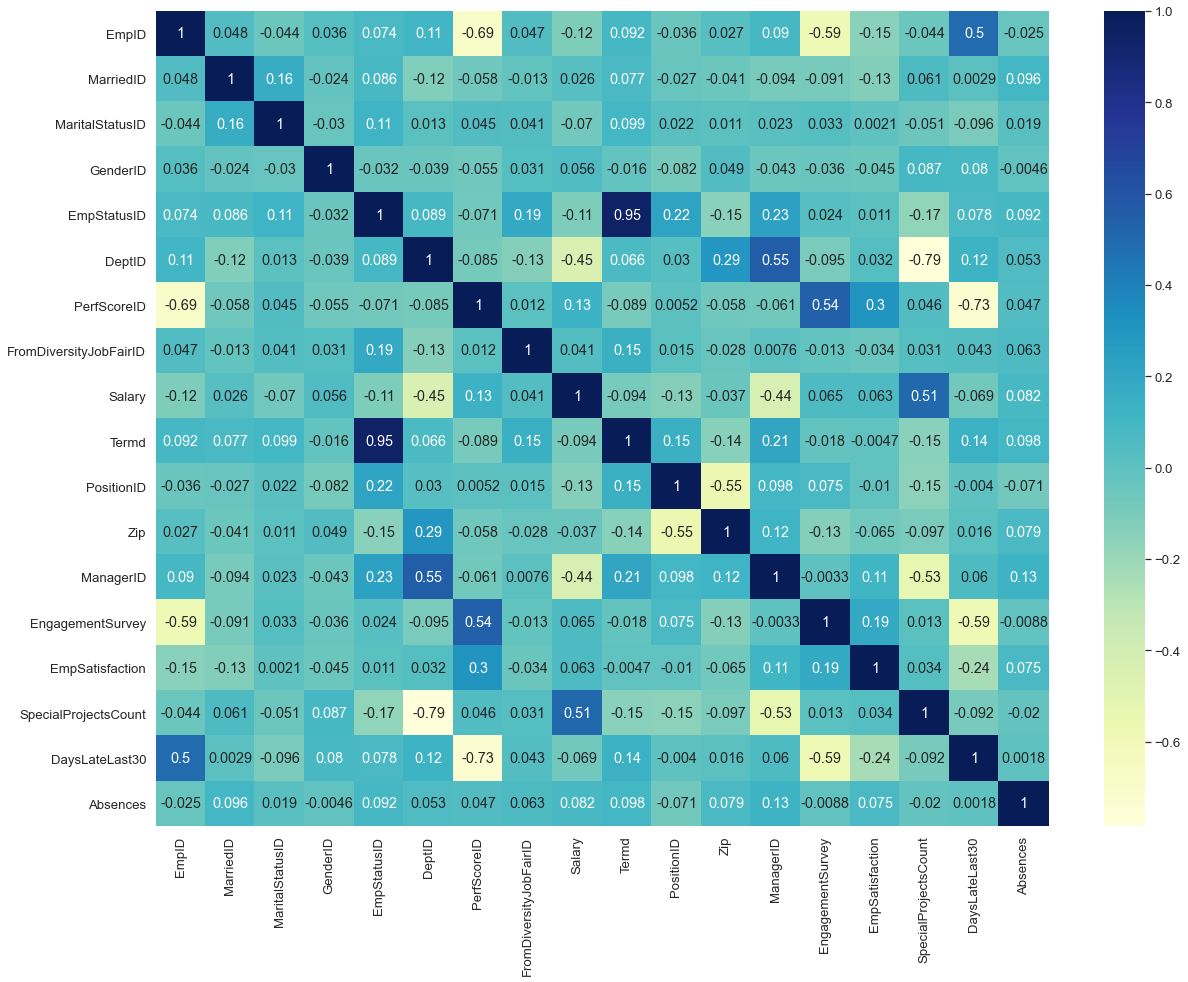

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

# Preprocesamiento


In [10]:
df = df.drop(
    [
        'Employee_Name', 'EmpID', 'MaritalStatusID', 'PositionID', 'DeptID', 'PerfScoreID', 'EmpStatusID', 
        'EmploymentStatus', 'DateofTermination', 'TermReason', 'ManagerID'
    ], axis=1)

In [11]:
# encode_dates, onehot_encode y ordinal_encode sacado del notebook https://www.kaggle.com/code/gcdatkin/employee-termination-prediction
def encode_dates(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        df[column] = pd.to_datetime(df[column])
        
        # df[prefix + '_year'] = df[column].apply(lambda x: x.year)
        df[prefix + '_month'] = df[column].apply(lambda x: x.month)
        df[prefix + '_day'] = df[column].apply(lambda x: x.day)
        
        df = df.drop(column, axis=1)
    return df

def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

def ordinal_encode(df, columns_with_orderings):
    df = df.copy()
    
    for column, ordering in columns_with_orderings:
        df[column] = df[column].apply(lambda x: ordering.index(x))
        
    return df

# One-hot encoding
nominal_columns = [
    ('Position', "PS"),
    ('State', "ST"),
    ('Zip', "ZP"),
    ('MaritalDesc', "MD"),
    ('CitizenDesc', "CD"),
    ('HispanicLatino', "HL"),
    ('RaceDesc', "RD"),
    ('Department', "DE"),
    ('ManagerName', "MN"),
    ('RecruitmentSource', "RS"),
    ('Sex', 'S')
]
date_columns = [('DOB', "DOB"), ('DateofHire', "DOH"), ('LastPerformanceReview_Date', "PRD")]

df = encode_dates(df, columns_with_prefixes=date_columns)

# transforma las columnas elegidas en binario
df = onehot_encode(df, columns_with_prefixes=nominal_columns)

# transforma el score de performance en un valor numérico
ordinal_columns = [
    ('PerformanceScore', ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds'])
]
df = ordinal_encode(df, columns_with_orderings=ordinal_columns)

In [12]:

reg = LinearRegression()





In [13]:
sample = df.sample(100)
y = sample["Salary"].copy()
X = sample.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.shape,y_test.shape

((20, 290), (20,))



-0.15070845356306628
ACCURACY TRAIN:  0.0125
ACCURACY TEST:  0.0


VARIANCE TRAIN:  1.0
VARIANCE TEST:  -0.0062835872025417405
Coefficients: 
 [ 1.73555103e+03 -1.00907495e+03 -1.72637637e+03 -2.65819155e+03
 -1.25322971e+03  2.92747677e+03 -2.11020999e+03 -5.45275678e+03
  8.10620620e+02  2.46828942e+02  7.79188993e+02 -1.40652809e+02
 -1.63334941e+02 -1.99876480e+02  1.68384803e+03  2.81107852e+02
  9.34097343e+02 -6.58211042e+03 -6.11005912e+03  8.70346522e+03
  5.61585735e+00 -7.58587599e+00  4.40787419e+02  1.05330150e+03
 -4.92944124e+00  2.43137859e+00 -4.50674951e+00  3.13580247e+00
 -6.83182232e-01 -1.09488311e+00 -8.59542059e-02 -2.68471759e+00
  3.63794194e+00 -5.48011450e+03 -2.94575934e+03  3.48167721e+04
  2.36754788e+00 -2.13894199e+03 -1.87527283e+04 -5.79244430e+03
 -4.63808845e+03 -8.03827564e+02 -2.68620996e-01  7.29228391e+03
 -4.30541381e-01 -2.65209156e+00  1.59636238e+00 -9.08975412e-01
  2.26040199e-01  4.21165516e-01  2.21807054e+00 -9.60095106e-01
 -2.173997

KeyError: 0

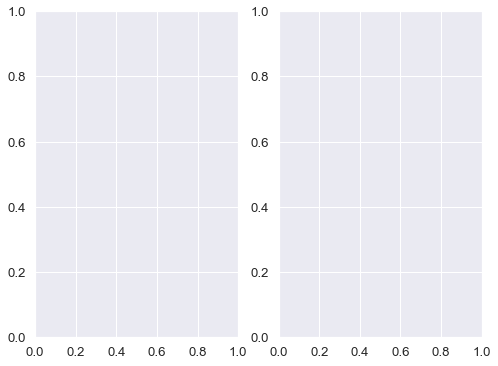

In [14]:
for i in range(10): 
  sample = df.sample(100)
  y = sample["Salary"].copy()
  X = sample.drop("Salary", axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  reg.fit(X_train,y_train)
  y_pred_train = reg.predict(X_train)
  y_pred_test = reg.predict(X_test)
  print("\n")

  print(reg.score(X_test, y_test))
  print("ACCURACY TRAIN: ",np.sum(y_pred_train==y_train)/len(y_train))
  print("ACCURACY TEST: ",np.sum(y_pred_test==y_test)/len(y_test))

  print("\n")

  print("VARIANCE TRAIN: ", explained_variance_score(y_train, y_pred_train))
  print("VARIANCE TEST: ", explained_variance_score(y_test, y_pred_test))


  fig, axes = plt.subplots(figsize=(8,6), nrows=1, ncols=2)

  # The coefficients
  print("Coefficients: \n", reg.coef_)
  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
  # The coefficient of determination: 1 is perfect prediction
  print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))

  # Plot outputs
  plt.scatter(X_test[0], y_test, color="black")
  plt.plot(X_test, y_pred_test, color="blue", linewidth=3)


  plt.show()
  plt.tight_layout()


In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
  plot_confusion_matrix(clf, X_train, y_train, display_labels=labels,cmap=plt.cm.GnBu, ax=axes[0])
  axes[0].grid(False)
  axes[0].set_title('Confusion Train')

  cm = confusion_matrix(y_test, y_pred_test)
  plot_confusion_matrix(clf, X_test, y_test, display_labels=labels,cmap=plt.cm.GnBu, ax=axes[1])
  axes[1].grid(False)
  axes[1].set_title('Confusion Test')

  plt.show()
  plt.tight_layout(

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## segundo dataset:


In [15]:
df2 =  pd.read_csv('Maths.csv')
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [20]:
df.loc[df['G3']> 10,'race_label'] = 'White'

for i in range (395):
    if df2['G3'] > 10:
        df2.insert('pass or fail')
df2.head()

ValueError: Length of values (1) does not match length of index (395)

In [16]:
sample = df2.sample(100)
y = sample["G3"].copy()
X = sample.drop("G3", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.shape,y_test.shape

((20, 32), (20,))

In [18]:
for i in range(10): 
  sample = df2.sample(100)
  y = sample["G3"].copy()
  X = sample.drop("G3", axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  reg.fit(X_train,y_train)
  y_pred_train = reg.predict(X_train)
  y_pred_test = reg.predict(X_test)
  print("\n")

  print(reg.score(X_test, y_test))
  print("ACCURACY TRAIN: ",np.sum(y_pred_train==y_train)/len(y_train))
  print("ACCURACY TEST: ",np.sum(y_pred_test==y_test)/len(y_test))

  print("\n")

  print("VARIANCE TRAIN: ", explained_variance_score(y_train, y_pred_train))
  print("VARIANCE TEST: ", explained_variance_score(y_test, y_pred_test))


  fig, axes = plt.subplots(figsize=(8,6), nrows=1, ncols=2)

  # The coefficients
  print("Coefficients: \n", reg.coef_)
  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
  # The coefficient of determination: 1 is perfect prediction
  print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))

  # Plot outputs
  plt.scatter(X_test[0], y_test, color="black")
  plt.plot(X_test, y_pred_test, color="blue", linewidth=3)


  plt.show()
  plt.tight_layout()


ValueError: could not convert string to float: 'GP'